In [43]:
import os
import urllib, cStringIO

import pymongo as pm

from IPython.display import clear_output

import matplotlib
from matplotlib import pylab, mlab, pyplot
%matplotlib inline
from IPython.core.pylabtools import figsize, getfigs
plt = pyplot
import seaborn as sns
sns.set_context('poster')
sns.set_style('white')

import numpy as np
from __future__ import division
import scipy.stats as stats
import pandas as pd
import json
import re

from PIL import Image
import base64
import json
import analysis_helpers as h
reload(h)

## get standardized object list
categories = ['bird','car','chair','dog']
obj_list = []
for cat in categories:
    for i,j in h.objcat.iteritems():
        if j==cat:
            obj_list.append(i)   

### load in model param posterior (bdaOutput/**splitbyobjectParams.csv)

#### make loglikelihood plot for human encoder version

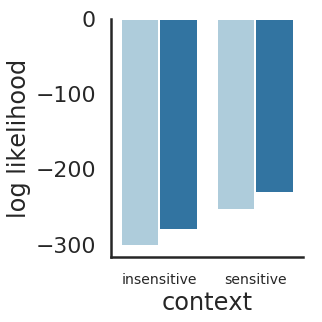

In [44]:
model_prefixes = ['human']
PP = h.model_comparison_bars(model_prefixes,adaptor_type='human')
h.plot_human_bars(PP)

In [21]:
PP

,model,logLikelihood,perception,pragmatics,production
0,human_S0_cost,-280.872004,human,S0,cost
1,human_S0_nocost,-302.543329,human,S0,nocost
2,human_combined_cost,-232.667310,human,combined,cost
3,human_combined_nocost,-254.589197,human,combined,nocost


#### make loglikelihood plot for multimodal convnet encoder version

In [50]:
adaptor_type = 'multimodal_fc6'
split_type = '1'
model_prefixes = [adaptor_type]
PP = h.model_comparison_bars(model_prefixes,adaptor_type=adaptor_type,split_type='balancedavg{}'.format(split_type))
# h.plot_multimodal_bars(PP)
PP

,model,logLikelihood,adaptor,perception,pragmatics,production
0,multimodal_fc6_S0_cost,-565.695717,multimodal,fc6,S0,cost
1,multimodal_fc6_S0_nocost,-567.651735,multimodal,fc6,S0,nocost
2,multimodal_fc6_combined_cost,-479.642148,multimodal,fc6,combined,cost
3,multimodal_fc6_combined_nocost,-485.533552,multimodal,fc6,combined,nocost


In [28]:
adaptor_type = 'multimodal_conv42'
split_type = '1'
model_prefixes = ['multimodal_conv42']
PP = h.model_comparison_bars(model_prefixes,adaptor_type=adaptor_type,split_type='balancedavg{}'.format(split_type))
# h.plot_multimodal_bars(PP)
PP

,model,logLikelihood,adaptor,perception,pragmatics,production
0,multimodal_conv42_S0_cost,-761.169886,multimodal,conv42,S0,cost
1,multimodal_conv42_S0_nocost,-764.507610,multimodal,conv42,S0,nocost
2,multimodal_conv42_combined_cost,-761.189535,multimodal,conv42,combined,cost
3,multimodal_conv42_combined_nocost,-707.762607,multimodal,conv42,combined,nocost


In [29]:
adaptor_type = 'multimodal_pool1'
split_type = '1'
# model_prefixes = ['multimodal_pool1','multimodal_conv42','multimodal_fc6']
model_prefixes = ['multimodal_pool1']
PP = h.model_comparison_bars(model_prefixes,adaptor_type=adaptor_type,split_type='balancedavg{}'.format(split_type))
# h.plot_multimodal_bars(PP)
PP

,model,logLikelihood,adaptor,perception,pragmatics,production
0,multimodal_pool1_S0_cost,-1125.238673,multimodal,pool1,S0,cost
1,multimodal_pool1_S0_nocost,-1125.261847,multimodal,pool1,S0,nocost
2,multimodal_pool1_combined_cost,-1108.363346,multimodal,pool1,combined,cost
3,multimodal_pool1_combined_nocost,-1108.785184,multimodal,pool1,combined,nocost


#### check that distribution of log likelihoods is higher for the cost version of the model vs. nocost version

In [ ]:
h.check_mean_LL_for_cost_vs_nocost(model_prefixes=['multimodal_fc6'],
                                     adaptor_type = 'multimodal_fc6',
                                     split_type='balancedavg1',
                                     plot=True)

### Run evaluate to get scores on the test set

In [ ]:
### FIRST STEP:
### iterate through Params and write back out in "flattened" form
reload(h)
reallyRun = 0
if reallyRun:
    h.flatten_param_posterior(adaptor_types = ['multimodal_pool1','multimodal_conv42','multimodal_fc6', 'human'],
                              verbosity=1)

In [60]:
#### SECOND STEP: Go to RSA.py and run evaluate on all of the models and splits
### e.g.,
### python RSA.py --wppl evaluate --perception human --pragmatics combined --production cost --split_type balancedavg1 balancedavg2 balancedavg3 balancedavg4 balancedavg5
### python RSA.py --wppl evaluate --perception multimodal_fc6 --pragmatics combined --production cost --split_type balancedavg1 balancedavg2 balancedavg3 balancedavg4 balancedavg5
### python RSA.py --wppl evaluate --perception multimodal_conv42 --pragmatics combined --production cost --split_type balancedavg1 balancedavg2 balancedavg3 balancedavg4 balancedavg5
### python RSA.py --wppl evaluate --perception multimodal_fc6 --pragmatics S0 --production cost --split_type balancedavg1 balancedavg2 balancedavg3 balancedavg4 balancedavg5
### python RSA.py --wppl evaluate --perception multimodal_fc6 --pragmatics combined --production nocost --split_type balancedavg1 balancedavg2 balancedavg3 balancedavg4 balancedavg5

<module 'analysis_helpers' from 'analysis_helpers.py'>

### check model predictions 

- retrieval
- cost plot

In [62]:
### prior to running bda-enumerate, wouldn't it help to get a sense for the extreme values
### in the param posterior for each model, for each split to make sure our grid covers 
### everywhere where there is some mass in the posterior?
reload(h)
reallyRun = 0
if reallyRun:
    h.get_sense_for_param_range_across_splits()

In [ ]:
import analysis_helpers as h
reload(h)

split_types = ['balancedavg1','balancedavg2','balancedavg3','balancedavg4','balancedavg5']

model_space = ['human_combined_cost','multimodal_fc6_combined_cost','multimodal_conv42_combined_cost',
              'multimodal_fc6_S0_cost','multimodal_fc6_combined_nocost']

# ## define paths to model predictions
# split_type = 'balancedavg1'
# model = 'multimodal_conv42_combined_cost'

for model in model_space:
    for split_type in split_types[1:]:

        path_to_evaluate = '/data2/jefan/sketchpad_basic_model_output/evaluateOutput/{}_{}'.format(model,split_type)
        pred_files = [os.path.join(path_to_evaluate,i) for i in os.listdir(path_to_evaluate)]

        ## get file with params from this model
        if model.split('_')[0]=='human':
            bdaOutDir = '_'.join(model.split('_')[:1]) + '_{}'.format(split_type)
        else:
            bdaOutDir = '_'.join(model.split('_')[:2]) + '_{}'.format(split_type)
        params_fname = model + '_' + split_type + 'ParamsFlattened.csv'
        params_path = os.path.join('../models/bdaOutput',bdaOutDir,'flattened',params_fname)
        params = pd.read_csv(params_path)
        assert np.round(np.sum(np.exp(params.posteriorProb.values)),12)==1

        ## get list of all predictives (accepted MCMC samples) and
        h.sort_filelist(pred_files) ## sort pred_files into human ordering


        Obj = []
        Cond = []
        TargetRank = []
        FoilRank = []
        Logprob = []
        SampleID = []
        Trial = []
        Adaptor = []

        ## loop through MCMC samples
        for i,this_sample in enumerate(pred_files):
            print 'Currently evaluating {} {}'.format(model,split_type)
            print'{} | sample ID: {} '.format(i,int(this_sample.split('/')[-1].split('Predictives.csv')[0]))

            ## read in predictions from this sample        
            sample_preds = pd.read_csv(this_sample)
            sample_ind = int(this_sample.split('/')[-1].split('Predictives.csv')[0]) ## index of MCMC sample
            clear_output(wait=True)        

            ## get params that generated these predictions
        #     simScaling = params.iloc[sample_ind]['simScaling']
        #     pragWeight = params.iloc[sample_ind]['pragWeight']
        #     costWeight = params.iloc[sample_ind]['costWeight']
        #     infWeight = params.iloc[sample_ind]['infWeight']    
        #     posteriorProb = params.iloc[sample_ind]['posteriorProb']
        #     logLikelihood = params.iloc[sample_ind]['logLikelihood']        

            ## get congruent/incongruent context log odds for each sketch
            trials = np.unique(sample_preds['game'].values)

            for this_trial in trials:
                ## subset the rows that correspond to this particular trial
                trial_inds = sample_preds['game']==this_trial
                these_rows = sample_preds[trial_inds]

                assert np.round(sum(np.exp(these_rows['modelProb'].values)),6)==1

                ## sort the 64 sketch categories by model probability 
                sorted_rows = these_rows.sort_values(by=['modelProb'],ascending=False).reset_index()

                ## get target rank, logprob, prob
                target = np.unique(sorted_rows['TrueSketch'].values)[0]
                if target.split('_')[0]=='closer':
                    foil = 'further_{}'.format(target.split('_')[1])
                elif target.split('_')[0]=='further':
                    foil = 'closer_{}'.format(target.split('_')[1])
                target_rank = sorted_rows.index[sorted_rows['PossibleSketch']==target].tolist()[0]+1
                foil_rank = sorted_rows.index[sorted_rows['PossibleSketch']==foil].tolist()[0]+1
                target_logprob = sorted_rows.iloc[target_rank]['modelProb']
                target_prob = np.exp(target_logprob)
                obj = sorted_rows.iloc[target_rank]['Target']
                condition = sorted_rows.iloc[target_rank]['condition']    
                Obj.append(obj)
                Cond.append(condition)
                TargetRank.append(target_rank)
                FoilRank.append(foil_rank)
                Logprob.append(target_logprob)
                SampleID.append(sample_ind)
                Trial.append(this_trial)
                Adaptor.append(model)


        ## make dataframe
        print 'Now making dataframe'
        X = pd.DataFrame([Obj,Cond,TargetRank,FoilRank,Logprob,SampleID,Trial,Adaptor])
        X = X.transpose()
        X.columns = ['object','condition','target_rank','foil_rank','logprob','sample_ind','trial','adaptor']
        if not os.path.exists('./csv'):
            os.makedirs('./csv')
        X.to_csv('./csv/{}_{}_predictions.csv'.format(model,split_type))     
        print 'Dataframe successfully saved out.'

Currently evaluating human_combined_cost balancedavg2
85 | sample ID: 85 


#### now read in predictions and compute retrieval performance

In [61]:
def convert_numeric(X):
    ## make numeric types for aggregation
    X['target_rank'] = pd.to_numeric(X['target_rank'])
    X['foil_rank'] = pd.to_numeric(X['foil_rank'])
    X['logprob'] = pd.to_numeric(X['logprob'])
    return X

def add_diff_rank(X):
    X['diff_rank'] = X['target_rank'] - X['foil_rank']
    X['sign_diff_rank'] = X['diff_rank']<0
    return X

In [77]:
H = pd.read_csv('./csv/human_combined_cost_balancedavg1_predictions.csv')
M = pd.read_csv('./csv/multimodal_fc6_combined_cost_balancedavg1_predictions.csv')
M0 = pd.read_csv('./csv/multimodal_conv42_combined_cost_balancedavg1_predictions.csv')
M1 = pd.read_csv('./csv/multimodal_fc6_S0_cost_balancedavg1_predictions.csv')
M2 = pd.read_csv('./csv/multimodal_fc6_combined_nocost_balancedavg1_predictions.csv')

### some preprocessing
H = add_diff_rank(convert_numeric(H))
M = add_diff_rank(convert_numeric(M))
M0 = add_diff_rank(convert_numeric(M0))
M1 = add_diff_rank(convert_numeric(M1))
M2 = add_diff_rank(convert_numeric(M2))

### add name of adaptor to the dataframe
adaptor = list(np.tile('human_combined_cost',len(H)))
H = H.assign(adaptor=pd.Series(adaptor).values)

adaptor = list(np.tile('multimodal_fc6_combined_cost',len(H)))
M = M.assign(adaptor=pd.Series(adaptor).values)

adaptor = list(np.tile('multimodal_conv42_combined_cost',len(H)))
M0 = M0.assign(adaptor=pd.Series(adaptor).values)

adaptor = list(np.tile('multimodal_fc6_S0_cost',len(H)))
M1 = M1.assign(adaptor=pd.Series(adaptor).values)

adaptor = list(np.tile('multimodal_fc6_combined_nocost',len(H)))
M2 = M2.assign(adaptor=pd.Series(adaptor).values)

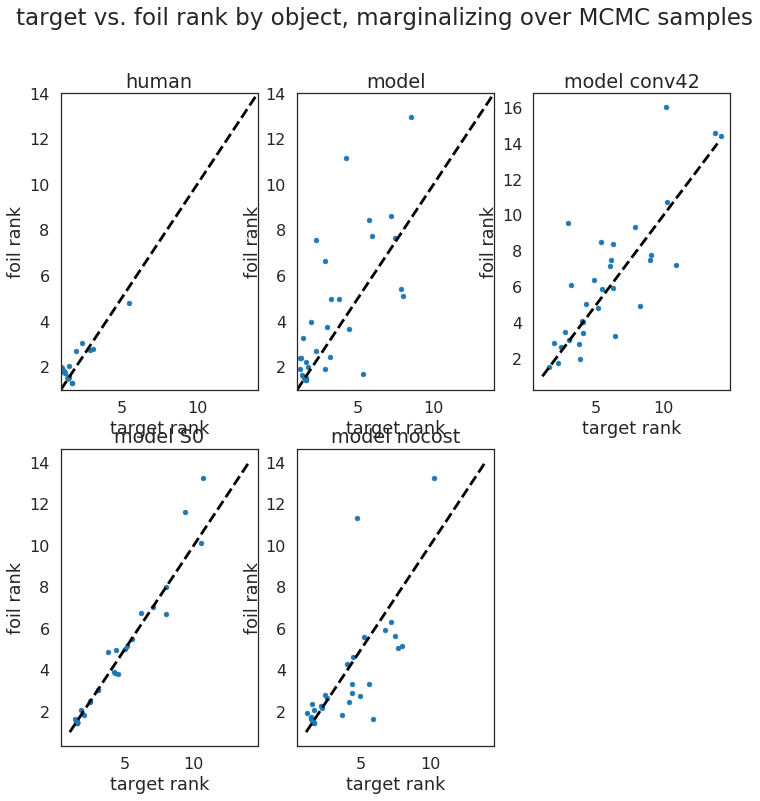

In [4]:
## what is the rank of the correct sketch category vs. wrong context condition, but correct object
fig = plt.figure(figsize=(12,12))
plt.suptitle('target vs. foil rank by object, marginalizing over MCMC samples')
plt.subplot(231)
targ = pd.DataFrame(H.groupby(['object'])['target_rank'].mean())['target_rank'].values
foil = pd.DataFrame(H.groupby(['object'])['foil_rank'].mean())['foil_rank'].values
h = plt.scatter(targ,foil,s=24)
plt.plot([1,14],[1,14],color='k',linestyle='dashed')
plt.xlim([1,14])
plt.ylim([1,14])
plt.xlabel('target rank')
plt.ylabel('foil rank')
plt.title('human')
plt.subplot(232)
targ = pd.DataFrame(M.groupby(['object'])['target_rank'].mean())['target_rank'].values
foil = pd.DataFrame(M.groupby(['object'])['foil_rank'].mean())['foil_rank'].values
h = plt.scatter(targ,foil,s=24)
plt.plot([1,14],[1,14],color='k',linestyle='dashed')
plt.xlim([1,14])
plt.ylim([1,14])
plt.xlabel('target rank')
plt.ylabel('foil rank')
plt.title('model')
plt.subplot(233)
targ = pd.DataFrame(M0.groupby(['object'])['target_rank'].mean())['target_rank'].values
foil = pd.DataFrame(M0.groupby(['object'])['foil_rank'].mean())['foil_rank'].values
h = plt.scatter(targ,foil,s=24)
plt.plot([1,14],[1,14],color='k',linestyle='dashed')
# plt.xlim([1,14])
# plt.ylim([1,14])
plt.xlabel('target rank')
plt.ylabel('foil rank')
plt.title('model conv42')
plt.subplot(234)
targ = pd.DataFrame(M1.groupby(['object'])['target_rank'].mean())['target_rank'].values
foil = pd.DataFrame(M1.groupby(['object'])['foil_rank'].mean())['foil_rank'].values
h = plt.scatter(targ,foil,s=24)
plt.plot([1,14],[1,14],color='k',linestyle='dashed')
# plt.xlim([1,14])
# plt.ylim([1,14])
plt.xlabel('target rank')
plt.ylabel('foil rank')
plt.title('model S0')
plt.subplot(235)
targ = pd.DataFrame(M2.groupby(['object'])['target_rank'].mean())['target_rank'].values
foil = pd.DataFrame(M2.groupby(['object'])['foil_rank'].mean())['foil_rank'].values
h = plt.scatter(targ,foil,s=24)
plt.plot([1,14],[1,14],color='k',linestyle='dashed')
# plt.xlim([1,14])
# plt.ylim([1,14])
plt.xlabel('target rank')
plt.ylabel('foil rank')
plt.title('model nocost')

In [5]:
print H['target_rank'].mean(), H['foil_rank'].mean()
print M['target_rank'].mean(), M['foil_rank'].mean()
print M0['target_rank'].mean(), M0['foil_rank'].mean()
print M1['target_rank'].mean(), M1['foil_rank'].mean()
print M2['target_rank'].mean(), M2['foil_rank'].mean()

1.6374420289855072 1.8757282608695651
3.3430072463768115 4.101047101449275
5.852333333333333 6.350438405797101
3.9001376811594204 3.994496376811594
3.760268115942029 3.439394927536232


In [50]:
# h = plt.hist(M['target_rank'] - M['foil_rank'],50)
print sum((H['target_rank'] - H['foil_rank'])<0)/len(M)
print sum((M['target_rank'] - M['foil_rank'])<0)/len(M)
print sum((M0['target_rank'] - M0['foil_rank'])<0)/len(M)
print sum((M1['target_rank'] - M1['foil_rank'])<0)/len(M)
print sum((M2['target_rank'] - M2['foil_rank'])<0)/len(M)

0.59697826087
0.638528985507
0.516076086957
0.505695652174
0.507275362319


In [122]:
def get_avg_rank_across_samples(X):
    '''
    make another dataframe which computes, for each MCMC sample, the average rank of the target
    (congruent context category)
    '''
    XM = pd.DataFrame(X.groupby('sample_ind')['target_rank'].mean()).reset_index()
    adaptor = np.unique(X['adaptor'].values)[0]
    adaptor = list(np.tile(adaptor,len(XM)))
    XM = XM.assign(adaptor=pd.Series(adaptor).values)    
    return XM
                      

In [123]:
HU,MU,M0U,M1U,M2U = map(get_avg_rank_across_samples,[H,M,M0,M1,M2])

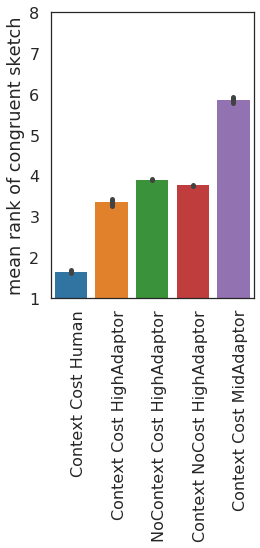

In [147]:
## plot average rank 
fig = plt.figure(figsize=(4,8))
ax = fig.add_subplot(111)
U = pd.concat([HU,MU,M0U,M1U,M2U],axis=0)
sns.barplot(data=U,
            x='adaptor',
            y='target_rank',
            ci='sd',
            order=['human_combined_cost','multimodal_fc6_combined_cost',
                   'multimodal_fc6_S0_cost','multimodal_fc6_combined_nocost',
                   'multimodal_conv42_combined_cost'])
plt.ylabel('mean rank of congruent sketch')
plt.ylim([1,8])
xticklabels=['Context Cost Human','Context Cost HighAdaptor',
             'NoContext Cost HighAdaptor','Context NoCost HighAdaptor',
             'Context Cost MidAdaptor']
plt.xlabel('')
l = ax.set_xticklabels(xticklabels, rotation = 90, ha="left")
plt.tight_layout()

In [86]:
def get_prop_congruent(X):
    '''
    make another data frame that computes, for each MCMC sample, the proportion of trials 
    on which model assigns better rank to congruent sketch than sketch from opposite context category ('foil')
    '''
    XM = pd.DataFrame(X.groupby('sample_ind')['sign_diff_rank'].apply(lambda x: sum(x)/len(x))).reset_index()
    adaptor = np.unique(X['adaptor'].values)[0]
    adaptor = list(np.tile(adaptor,len(XM)))
    XM = XM.assign(adaptor=pd.Series(adaptor).values)    
    return XM

HD,MD,M0D,M1D,M2D = map(get_prop_congruent,[H,M,M0,M1,M2])


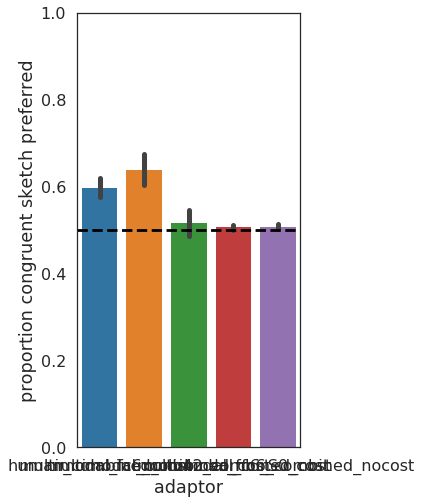

In [115]:
## plot proportion of trials for which context-congruent sketch preferred over incongruent sketch
D = pd.concat([HD,MD,M0D,M1D,M2D],axis=0)
fig = plt.figure(figsize=(4,8))
sns.barplot(data=D,
            x='adaptor',
            y='sign_diff_rank',ci='sd')
plt.axhline(y=0.5,linestyle='dashed',color='k')
plt.ylim([0,1])
plt.ylabel('proportion context-congruent sketch preferred')

In [752]:
### make a "top-k" plot (what percentage of sketches in the top k)

model_space = ['human_combined_cost','multimodal_fc6_combined_cost','multimodal_conv42_combined_cost',
              'multimodal_fc6_S0_cost','multimodal_fc6_combined_nocost']

dfs = H,M,M0,M1,M2

model_df_dict = dict(zip(model_space,dfs))

for j,model in enumerate(model_space):
    print '{} evaluating {}'.format(j,model)
    clear_output(wait=True)        
    D = model_df_dict[model]   
    
    sample_inds = np.unique(D.sample_ind.values)
    prop = []
    sid = []
    K = []
    for i,sample_ind in enumerate(sample_inds):
        if i%250==0:
            print 'evaluating {}'.format(i)
        these_rows = D[D['sample_ind']==sample_ind]
        num_trials = these_rows.shape[0]
        for k in np.arange(1,65):
            prop.append(sum(these_rows['target_rank']<=k)/num_trials)
            sid.append(sample_ind)
            K.append(k)

    ## make dataframe and save out
    sid = map(int,sid)
    K = map(int,K)
    adaptor = list(np.tile(model,len(sid)))
    Q = pd.DataFrame([prop,sid,K,adaptor])
    Q = Q.transpose()
    Q.columns = ['prop','ind','k','adaptor']
    print model, split_type
    Q.to_csv('./csv/{}_{}_topk.csv'.format(model,split_type),index=False)        

evaluating 750
multimodal_fc6_combined_nocost balancedavg1


In [6]:
## aggregate across comparison models
QH = pd.read_csv('./csv/human_combined_cost_balancedavg1_topk.csv')
QM = pd.read_csv('./csv/multimodal_fc6_combined_cost_balancedavg1_topk.csv')
QM0 = pd.read_csv('./csv/multimodal_conv42_combined_cost_balancedavg1_topk.csv')
QM1 = pd.read_csv('./csv/multimodal_fc6_S0_cost_balancedavg1_topk.csv')
QM2 = pd.read_csv('./csv/multimodal_fc6_combined_nocost_balancedavg1_topk.csv')
Q = pd.concat([QH,QM0,QM1,QM2,QM],axis=0)

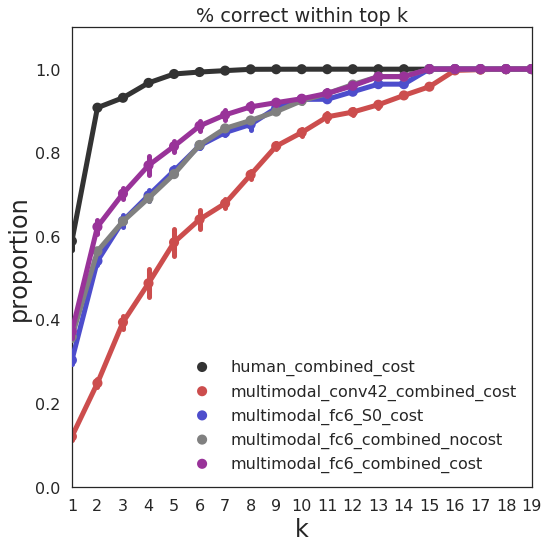

In [24]:
## plot it
krange = 64 ## how many values of k to plot
sns.set_context('poster')
fig = plt.figure(figsize=(8,8))
colors = [(0.2,0.2,0.2),(0.8,0.3,0.3),(0.3,0.3,0.8),(0.5,0.5,0.5),(0.6,0.2,0.6)]
sns.pointplot(x='k',
              y='prop',
              hue='adaptor',
              data=Q,
              palette=colors,
              markers = '.',
              ci='sd',              
              join=True)
plt.ylabel('proportion',fontsize=24)
plt.xlabel('k',fontsize=24)
plt.title('% correct within top k')
plt.ylim([0,1.1])
# plt.xlim([-0.1,krange])
plt.xlim([0,18])
# locs, labels = plt.xticks(np.linspace(0,krange-1,9),map(int,np.linspace(0,krange-1,9)+1),fontsize=16)
plt.tight_layout()
plt.legend()

(276000, 11)

In [ ]:
### show the average cost (time, strokes, ink) for average model prediction

In [ ]:
split_type = 'balancedavg1'
path_to_costs = '/home/jefan/visual_communication_in_context/models/refModule/json/{}'.format(split_type)



In [25]:
reallyRun = 0
if reallyRun:
    import analysis_helpers as h
    reload(h)

    for this_model in model_zoo:

        ## define paths to model predictions
        path_to_evaluate = '/data2/jefan/sketchpad_basic_model_output/evaluateOutput'
        model_dirname = ('_').join(this_model.split('_')[:4])
        pred_path = os.path.join(path_to_evaluate,model_dirname)

        ## get file with params from this model
        this_params = os.path.join('../models/bdaOutput',this_model)
        params = pd.read_csv(this_params)
        assert np.round(np.sum(np.exp(params.posteriorProb.values)),12)==1

        ## get list of all predictives (accepted MCMC samples)
        pred_files = [i for i in os.listdir(pred_path) if i[-15:] =='Predictives.csv']
        h.sort_filelist(pred_files) ## sort pred_files into human ordering

        X = [] ## initialize giant dataframe that contains predictions from all MCMC samples

        ## loop through MCMC samples
        for i,this_sample in enumerate(pred_files):
            print 'Currently evaluating {}'.format(model_dirname)
            print'{} | sample ID: {} '.format(i,int(this_sample.split('Predictives.csv')[0]))
            ## read in predictions from this sample
            sample_path = os.path.join(pred_path,this_sample)
            sample_preds = pd.read_csv(sample_path)
            sample_ind = int(this_sample.split('Predictives.csv')[0]) ## index of MCMC sample
            clear_output(wait=True)

            #### get params that generated these predictions
            #alpha = params.iloc[sample_ind]['alpha']
            #simScaling = params.iloc[sample_ind]['simScaling']
            #pragWeight = params.iloc[sample_ind]['pragWeight']
            #costWeight = params.iloc[sample_ind]['costWeight']
            posteriorProb = params.iloc[sample_ind]['posteriorProb']
            #logLikelihood = params.iloc[sample_ind]['logLikelihood']

            ## get congruent/incongruent context log odds for each sketch
            sketches = np.unique(sample_preds['trueSketch'].values)
            log_odds = []
            label = []
            condition = []
            cp = []
            op = []
            for this_sketch in sketches:
                sketch_inds = sample_preds['trueSketch']==this_sketch
                these_rows = sample_preds[sketch_inds]
                cond = np.unique(these_rows['condition'].values)[0]
                other_cond = [i for i in ['closer','further'] if i != cond][0]
                obj = these_rows.iloc[0]['Target'].split('_')[-1]
                congruent_prob = these_rows[these_rows['coarseGrainedPossibleSketch']=='{}_{}'.format(cond,obj)]['modelProb'].values[0]
                other_prob = these_rows[these_rows['coarseGrainedPossibleSketch']=='{}_{}'.format(other_cond,obj)]['modelProb'].values[0]
                log_odds.append(congruent_prob - other_prob)
                cp.append(congruent_prob)
                op.append(other_prob)
                label.append(obj)
                condition.append(cond)  

            ## make dataframe out of this sample
            sampleProb = [posteriorProb]*len(condition) ## take exp of posteriorProb, which is already in log space
            sampleInd = [sample_ind]*len(conditiond)
            x = pd.DataFrame([sampleInd,sampleProb,condition,label,list(sketches),log_odds,cp,op])
            x = x.transpose()
            x.columns = ['sample_ind','sample_logprob','condition','label','sketch','odds','congruent_prob','other_prob']
            x = x.sort_values(by=['condition','label','sketch'])

            ## concatenate dataframes containing log-odds from all MCMC samples
            if len(X)==0:
                X = x
            else:
                X = pd.concat([X,x])

        # save out   
        X.odds = X.odds.astype('float')
        X.sample_prob = X.sample_prob.astype('float')
        print 'Saving out model predictions for {}'.format(model_dirname)
        X.to_csv('./predictions/{}_model_predictions_log_odds.csv'.format(model_dirname))

### analyze pattern of model predictions

In [551]:
### helpers
def bootstrapCI(x,nIter=1000):
    '''
    input: x is an array
    '''
    u = []
    for i in np.arange(nIter):
        inds = np.random.RandomState(i).choice(len(x),len(x))
        boot = x[inds]
        u.append(np.mean(boot))

    u = np.array(u)
    p1 = sum(u<0)/len(u) * 2
    p2 = sum(u>0)/len(u) * 2
    p = np.min([p1,p2])
    U = np.mean(u)
    lb = np.percentile(u,2.5)
    ub = np.percentile(u,97.5)
    return U,lb,ub,p

def sumlogprob(a,b):
    if (a > b):
        return a + np.log1p(np.exp(b-a))
    else:
        return b + np.log1p(np.exp(a-b)) 
    
def flatten(x):
    return [item for sublist in x for item in sublist]
    
    
def make_category_by_obj_palette():
    import itertools
    col = []
    for j in sns.color_palette("hls", 4):
        col.append([i for i in itertools.repeat(j, 8)])
    return flatten(col)    

In [538]:
for this_model in ['multimodal_full25k_combined_cost','multimodal_full25k_combined_nocost',\
                  'multimodal_full25k_S0_cost','multimodal_full25k_S0_nocost']:
    X = pd.read_csv('./predictions/{}_model_predictions_log_odds.csv'.format(this_model))
    try:
        X.rename(columns={'sample_prob':'sample_logprob'},inplace=True)
    except:
        print 'No column called sample_prob'


    ## get sample_prob in prob space by exponentiating sample_logprob    
    X['sample_prob'] = np.exp(X['sample_logprob'].values)
    ## sample_prob is already in prob space, congruent_prob is in log space
    X['weighted_congruent_prob'] = X['sample_prob']*np.exp(X['congruent_prob']) 
    X['weighted_other_prob'] = X['sample_prob']*np.exp(X['other_prob']) 

    assert np.round(X.groupby('sample_ind')['sample_prob'].mean().sum(),1)==1    

    ## which is the MAP sample?
    # MAP_sample_ind = X[X['sample_logprob']==np.max(X['sample_logprob'])]['sample_ind'].unique()[0]
    # XMAP = X[X['sample_ind']==MAP_sample_ind]

    ## make dataframe collapsed down to sketch level marginalizing over parameter values
    ## extract weighted congruent_prob and other_prob for each sketch
    CP = X.groupby('sketch')['weighted_congruent_prob'].sum().values
    OP = X.groupby('sketch')['weighted_other_prob'].sum().values
    COND = [i[0] for i in X.groupby('sketch')['condition'].unique().values]
    LABEL = [i[0] for i in X.groupby('sketch')['label'].unique().values]
    
    ## actually make dataframe
    P = pd.DataFrame([CP,OP,COND,LABEL]).transpose()
    P.columns = ['congruent_prob','other_prob','condition','label']
    P.congruent_prob = P.congruent_prob.astype('float')
    P.other_prob = P.other_prob.astype('float')
    P['total_class_prob'] = P['congruent_prob']+P['other_prob']
    P.total_class_prob = P.total_class_prob.astype('float')
    P['normalized_congruent_prob'] = P['congruent_prob']/P['total_class_prob']
    P['normalized_other_prob'] = P['other_prob']/P['total_class_prob']

    log_odds = np.log(P['congruent_prob'].values/P['other_prob'].values)
    P = P.assign(log_odds=pd.Series(log_odds).values)
    model_name = [this_model]*len(log_odds)
    perception = [this_model.split('_')[0]]*len(log_odds)
    pragmatics = [this_model.split('_')[-2]]*len(log_odds)
    production = [this_model.split('_')[-1]]*len(log_odds)
    P = P.assign(model_name = pd.Series(model_name).values) ## add model name to the dataframe
    P = P.assign(perception = pd.Series(perception).values)
    P = P.assign(pragmatics = pd.Series(pragmatics).values)
    P = P.assign(production = pd.Series(production).values) 

    sketch_id = np.arange(P.shape[0])
    P = P.assign(sketch_id = pd.Series(sketch_id).values)
    ## write out model decisions
    P.to_csv('./predictions/{}_model_predictions_log_odds_sketch_level.csv'.format(this_model),index=False)
        
    U,lb,ub,p = bootstrapCI(log_odds)    
    print np.round(U,3),np.round(lb,3),np.round(ub,3),np.round(p,3), this_model

0.236 0.166 0.308 0.0 multimodal_full25k_combined_cost
0.199 0.126 0.275 0.0 multimodal_full25k_combined_nocost
0.203 0.096 0.318 0.0 multimodal_full25k_S0_cost
0.163 0.095 0.231 0.0 multimodal_full25k_S0_nocost


### read in sketcher model predictions collapsed down to sketch level

In [539]:
PC = pd.read_csv('./predictions/multimodal_full25k_combined_cost_model_predictions_log_odds_sketch_level.csv')
PN = pd.read_csv('./predictions/multimodal_full25k_combined_nocost_model_predictions_log_odds_sketch_level.csv')
LC = pd.read_csv('./predictions/multimodal_full25k_S0_cost_model_predictions_log_odds_sketch_level.csv')
LN = pd.read_csv('./predictions/multimodal_full25k_S0_nocost_model_predictions_log_odds_sketch_level.csv')
M = pd.concat([PC,PN,LC,LN],axis=0)
M.reset_index(inplace=True)
M0 = M[['log_odds','sketch_id','pragmatics','production','model_name']]
M0.to_csv('./predictions/multimodal_full25k_all_variants_log_odds_sketch_level.csv')

In [540]:
M.head()

,index,congruent_prob,other_prob,condition,label,total_class_prob,normalized_congruent_prob,normalized_other_prob,log_odds,model_name,perception,pragmatics,production,sketch_id
0,0,0.325487,0.534660,closer,straight,0.860146,0.378408,0.621592,-0.496309,multimodal_full25k_combined_cost,multimodal,combined,cost,0
1,1,0.139640,0.091987,closer,leather,0.231627,0.602867,0.397133,0.417424,multimodal_full25k_combined_cost,multimodal,combined,cost,1
2,2,0.055857,0.051921,further,brown,0.107778,0.518262,0.481738,0.073080,multimodal_full25k_combined_cost,multimodal,combined,cost,2
3,3,0.076573,0.067624,further,redantique,0.144197,0.531028,0.468972,0.124272,multimodal_full25k_combined_cost,multimodal,combined,cost,3
4,4,0.178372,0.043862,further,inlay,0.222234,0.802630,0.197370,1.402815,multimodal_full25k_combined_cost,multimodal,combined,cost,4


In [579]:
this_model

'multimodal_full25k_S0_nocost'

#### make multimodal log odds plot

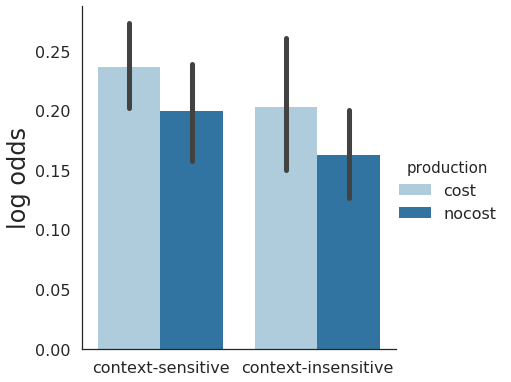

In [725]:
colors = sns.color_palette("Dark2")
sns.set_context('poster')
sns.catplot(x='pragmatics',
               hue='production',
               y='log_odds',
               data=M, size=6, kind='bar',palette='Paired',ci=68)
plt.ylabel('log odds',fontsize=24)
plt.xlabel(' ',fontsize=24)
locs, labels = plt.xticks([0,1],['context-sensitive','context-insensitive'],fontsize=16)
plt.savefig('./plots/{}_context_effect_log_odds_by_model_bars.pdf'.format(this_model.split('_')[0]))

In [529]:
diff = PC['log_odds'].values-PN['log_odds'].values
U,lb,ub,p = bootstrapCI(diff)
print U,lb,ub,p

diff = LC['log_odds'].values-LN['log_odds'].values
U,lb,ub,p = bootstrapCI(diff)
print U,lb,ub,p

diff = PC['log_odds'].values-LC['log_odds'].values
U,lb,ub,p = bootstrapCI(diff)
print U,lb,ub,p

0.036619062634156097 0.009392008086820242 0.06339017901571752 0.01
0.040616846072532485 -0.008445935244348604 0.09445570806948728 0.128
0.03274163944637461 -0.02657488732987849 0.08730852232326353 0.262


#### broken down by class

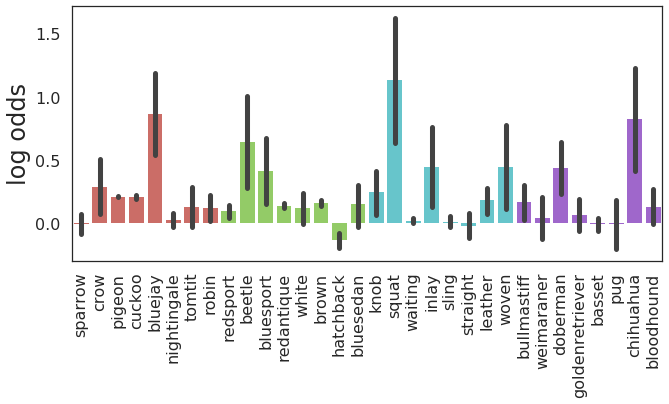

In [581]:
colors32 = make_category_by_obj_palette()
fig = plt.figure(figsize=(10,6))
sns.barplot(data=PC,
            x='label',
            order=obj_list,
            y='log_odds',
            palette=colors32,ci=68)
h = plt.xticks(range(len(obj_list)), obj_list, fontsize=16,rotation='vertical')
plt.ylabel('log odds',fontsize=24)
plt.xlabel('')
plt.tight_layout()
plt.savefig('./plots/{}_log_odds_ratio_congruent_sketch_type_in_context.pdf'.format(this_model.split('_')[0]))

In [ ]:
### how log odds behaves
p1 = 0.27*2.7*2.7
p2 = 0.1
print np.log(p1/p2)

#### calculate proportion of objects for which model able to predict correct condition+obj sketch category

In [627]:
_P = pd.read_csv('multimodal_full25k_combined_cost_aggregatedPredictives_longform.csv')

In [628]:
_P.head()

,trueSketch,possibleSketch,coarseGrainedTrueSketch,weighted
0,08711b390cfc_17,closer_basset,closer_straight,-8.651603
1,08711b390cfc_17,closer_beetle,closer_straight,-10.721931
2,08711b390cfc_17,closer_bloodhound,closer_straight,-13.805462
3,08711b390cfc_17,closer_bluejay,closer_straight,-11.182569
4,08711b390cfc_17,closer_bluesedan,closer_straight,-14.089705


In [632]:
## get dataframe with probability assigned to every sketch category, for each sketch category
P = _P.groupby(['coarseGrainedTrueSketch','possibleSketch'])['weighted'].\
apply(lambda x: reduce(sumlogprob,x) - np.log(len(x)))

## generate 4096x7ish dataframe with log probabilities already aggregated at course condition&object level
P = pd.DataFrame(P)
P.reset_index(inplace=True)
P['trueCondition'], P['trueSketchTarget'] = P['coarseGrainedTrueSketch'].str.split('_', 1).str
P['predCondition'], P['predSketchTarget'] = P['possibleSketch'].str.split('_', 1).str

In [636]:
P.head()

,coarseGrainedTrueSketch,possibleSketch,weighted,trueCondition,trueSketchTarget,predCondition,predSketchTarget
0,closer_basset,closer_basset,-2.348282,closer,basset,closer,basset
1,closer_basset,closer_beetle,-3.609396,closer,basset,closer,beetle
2,closer_basset,closer_bloodhound,-3.296828,closer,basset,closer,bloodhound
3,closer_basset,closer_bluejay,-7.167444,closer,basset,closer,bluejay
4,closer_basset,closer_bluesedan,-3.989862,closer,basset,closer,bluesedan


'closer'

In [650]:
## calculate proportion of objects for which model able to predict correct condition+obj sketch category
## i.e., put in top k, for various values of k
from __future__ import division
objs = np.unique(P['trueSketchTarget'].values)
conds = np.unique(P['trueCondition'].values)

Counter = []
Conds = []
K = []
for cond in conds:
    print 'Analyzing {}'.format(cond)
    for k in np.arange(1,64):
        counter = 0
        for obj in objs:    
            Q = P[(P['trueSketchTarget']==obj) & (P['trueCondition']==cond)].\
            nlargest(k,'weighted')[['coarseGrainedTrueSketch','possibleSketch','trueCondition','weighted']]  
            counter += np.sum(Q['possibleSketch']==Q['coarseGrainedTrueSketch'])
        Counter.append(counter/len(objs))
        Conds.append(cond)
        K.append(k)

Analyzing closer
Analyzing further


In [651]:
## make dataframe         
D = pd.DataFrame([Counter,Conds,K])
D = D.transpose()
D.columns = ['prop','condition','k']

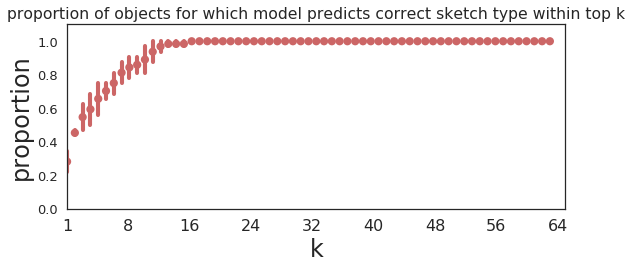

In [678]:
## plot it
krange = 64 ## how many values of k to plot
sns.set_context('talk')
fig = plt.figure(figsize=(9,4))
# sns.pointplot(x='k',y='prop',hue='condition',data=D,markers='.',palette=colors)
sns.pointplot(x='k',y='prop',data=D,markers='.',palette=[(0.8,0.4,0.4)])
plt.xlim([0,krange])
plt.ylabel('proportion',fontsize=24)
plt.xlabel('k',fontsize=24)
plt.title('proportion of objects for which model predicts correct sketch type within top k')
plt.ylim([0,1.1])
locs, labels = plt.xticks(np.linspace(0,krange-1,9),map(int,np.linspace(0,krange-1,9)+1),fontsize=16)
plt.tight_layout()
plt.savefig('./plots/{}_proportion_correct_sketch_type_in_top_k.pdf'.format(this_model))